<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/12tnbfn5m01wSOjQhh6O3UjSLzIsQ8mOm" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# **Clustering**

Primeros registros del dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


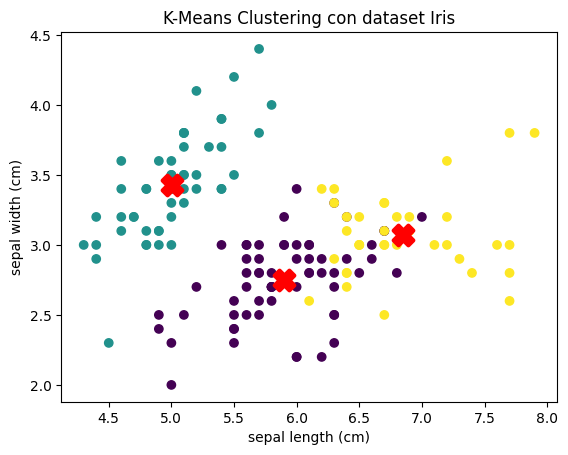

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el dataset Iris
iris = load_iris()
data = iris.data

# Crear un DataFrame para facilitar la visualización
df = pd.DataFrame(data, columns=iris.feature_names)
print("Primeros registros del dataset:")
print(df.head())

# Utilizar K-Means para encontrar 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

# Obtener las etiquetas de los clusters y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Añadir las etiquetas al DataFrame
df['Cluster'] = labels

# Visualización (solo para las dos primeras características)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='r')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("K-Means Clustering con dataset Iris")
plt.show()


In [2]:
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Cargar el dataset Iris
iris = load_iris()
data = iris.data

# Crear un DataFrame para facilitar la visualización
df = pd.DataFrame(data, columns=iris.feature_names)

# Utilizar K-Means para encontrar 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Añadir las etiquetas al DataFrame
df['Cluster'] = labels

# Crear la figura y el gráfico 3D
fig = go.Figure()

scatter = go.Scatter3d(x=df[iris.feature_names[0]],
                        y=df[iris.feature_names[1]],
                        z=df[iris.feature_names[2]],
                        mode='markers',
                        marker=dict(color=labels, colorscale='Viridis'))

fig.add_trace(scatter)

# Ajustar la relación de aspecto
fig.update_layout(scene=dict(aspectmode="cube"))

# Mostrar el gráfico
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np

# Cargar el conjunto de datos
data = load_breast_cancer()
X = data.data
y = data.target

# Crear el DataFrame
df = pd.DataFrame(X, columns=data.feature_names)

# Aplicar K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, init='random', n_init=10, tol=0.0001)
kmeans.fit(X)
labels = kmeans.labels_

# Evaluar los clusters respecto a la columna objetivo original
# Primero debemos asegurarnos de que las etiquetas coincidan, ya que K-Means asigna etiquetas arbitrarias
mapping = {}
for label in np.unique(labels):
    original_label = np.argmax(np.bincount(y[labels == label]))
    mapping[label] = original_label

mapped_labels = [mapping[label] for label in labels]

# Calcular la matriz de confusión y la precisión
conf_matrix = confusion_matrix(y, mapped_labels)
accuracy = accuracy_score(y, mapped_labels)

print(f"Matriz de Confusión:\n{conf_matrix}")
print(f"Precisión: {accuracy}")


Matriz de Confusión:
[[130  82]
 [  1 356]]
Precisión: 0.8541300527240774


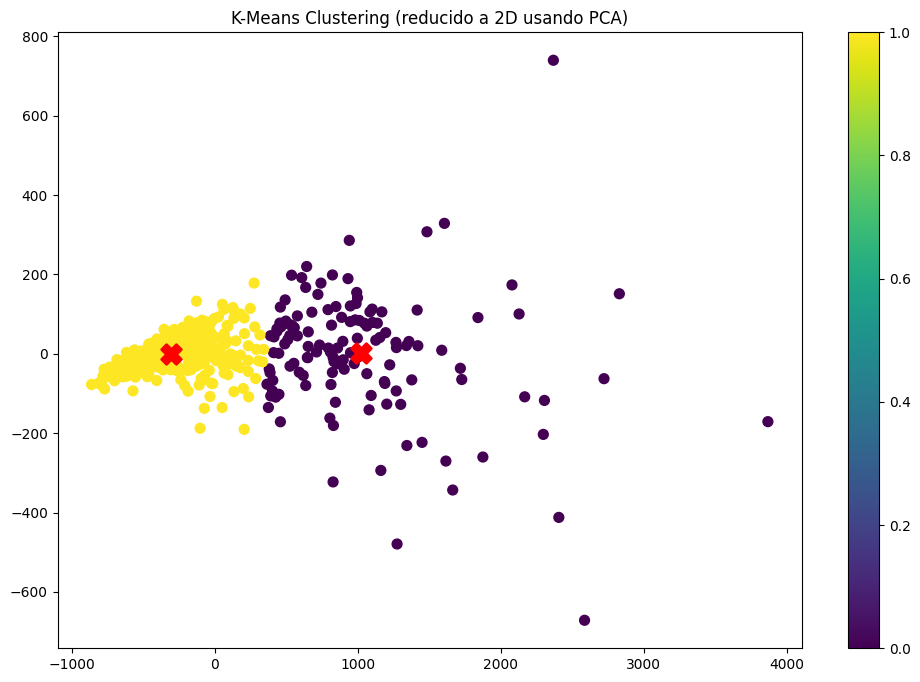

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Usar PCA para reducir las dimensiones a 2D
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

# Mapear las etiquetas de cluster para que coincidan con las etiquetas originales
mapping = {}
for label in np.unique(labels):
    original_label = np.argmax(np.bincount(y[labels == label]))
    mapping[label] = original_label

mapped_labels = [mapping[label] for label in labels]

# Visualizar los resultados
plt.figure(figsize=(12, 8))

# Mostrar los puntos en dos dimensiones
scatter = plt.scatter(X_r[:, 0], X_r[:, 1], c=mapped_labels, cmap='viridis', s=50)

# Mostrar los centroides
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=2, color='r', zorder=10)

plt.title("K-Means Clustering (reducido a 2D usando PCA)")
plt.colorbar(scatter)
plt.show()


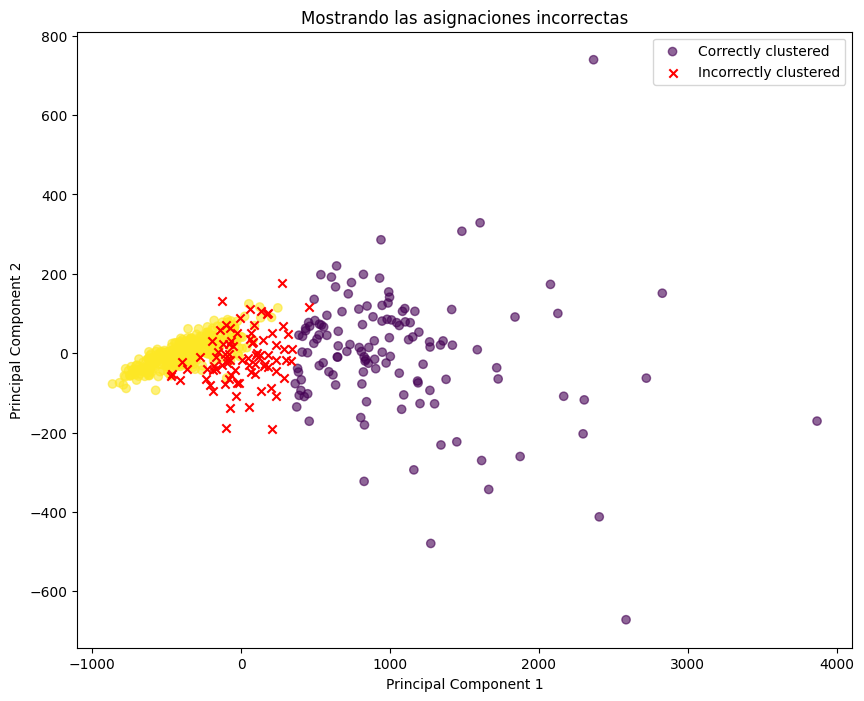

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Usar PCA para reducir las dimensiones a 2D
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

# Encontrar los puntos que se han asignado incorrectamente
incorrectly_assigned = (labels == y)

# Gráfico
plt.figure(figsize=(10, 8))

# Puntos correctamente asignados
plt.scatter(X_2D[~incorrectly_assigned, 0], X_2D[~incorrectly_assigned, 1], c=y[~incorrectly_assigned], cmap='viridis', marker='o', label='Correctly clustered', alpha=0.6)

# Puntos incorrectamente asignados
plt.scatter(X_2D[incorrectly_assigned, 0], X_2D[incorrectly_assigned, 1], c='red', marker='x', label='Incorrectly clustered')

# Añadir etiquetas y leyenda
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('Mostrando las asignaciones incorrectas')
plt.show()


In [6]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 3D para la visualización
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# Crear un DataFrame para almacenar los datos y etiquetas
df = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])
df['Real Labels'] = y
df['Cluster Labels'] = labels
df['Correct'] = df['Real Labels'] != df['Cluster Labels']

# Crear la figura 3D
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
                     color='Correct',
                     labels={'Correct': 'Clustering Correct'},
                     title="3D Scatter Plot of Clustering Results",
                     color_continuous_scale='Viridis')

fig.show()


In [ ]:
# Instalar plotly si aún no está instalado
!pip install plotly

import plotly.express as px
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Cargar el conjunto de datos
data = load_breast_cancer()
X = data.data
y = data.target

# Aplicar K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Usar PCA para reducir las dimensiones a 3D
pca = PCA(n_components=3)
X_r = pca.fit_transform(X)

# Mapear las etiquetas de cluster para que coincidan con las etiquetas originales
mapping = {}
for label in np.unique(labels):
    original_label = np.argmax(np.bincount(y[labels == label]))
    mapping[label] = original_label

mapped_labels = [mapping[label] for label in labels]

# Visualizar los resultados en 3D utilizando Plotly
fig = px.scatter_3d(x=X_r[:, 0], y=X_r[:, 1], z=X_r[:, 2], color=mapped_labels, labels={'color': 'Cluster'})
fig.update_traces(marker=dict(size=6, opacity=0.5))
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Cargar el conjunto de datos
data = load_breast_cancer()
X = data.data
y = data.target

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar Spectral Clustering
n_clusters = 2  # Queremos 2 clusters porque tenemos 2 clases en la columna objetivo
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
clusters = spectral_clustering.fit_predict(X_scaled)

# Utilizar una matriz de confusión para encontrar una asignación adecuada de las etiquetas de cluster a las clases originales
conf_mat = confusion_matrix(y, clusters)

# Si es necesario, reasignar las etiquetas de los clusters para que coincidan con las clases originales lo más posible
if np.argmax(conf_mat[0]) != 0:
    # Intercambiar las etiquetas de los clusters 0 y 1 si es necesario
    clusters = 1 - clusters

# Evaluar la calidad del agrupamiento
accuracy = accuracy_score(y, clusters)
print(f"Exactitud: {accuracy}")
print("Matriz de Confusión:")
print(confusion_matrix(y, clusters))


Exactitud: 0.9367311072056239
Matriz de Confusión:
[[182  30]
 [  6 351]]


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Cargar el conjunto de datos
data = load_breast_cancer()
X = data.data
y = data.target

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Utilizar Gaussian Mixture Model para el agrupamiento
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_scaled)
clusters = gmm.predict(X_scaled)

# La asignación de etiquetas en los clusters puede no coincidir con las etiquetas originales,
# así que usamos una matriz de confusión para ajustarlas si es necesario.
conf_mat = confusion_matrix(y, clusters)

# Reasignar etiquetas si es necesario
if np.argmax(conf_mat[0]) != 0:
    clusters = 1 - clusters

# Evaluar la calidad del agrupamiento
accuracy = accuracy_score(y, clusters)
print(f"Exactitud: {accuracy}")
print("Matriz de Confusión:")
print(confusion_matrix(y, clusters))


Exactitud: 0.9384885764499121
Matriz de Confusión:
[[196  16]
 [ 19 338]]


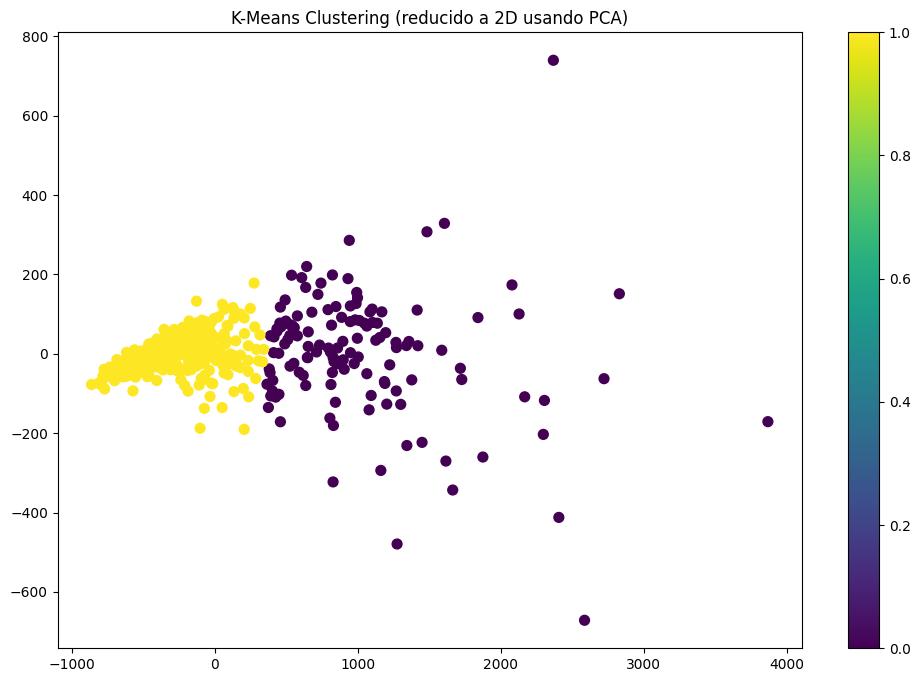

In [ ]:

# Visualizar los resultados
plt.figure(figsize=(12, 8))

# Mostrar los puntos en dos dimensiones
scatter = plt.scatter(X_r[:, 0], X_r[:, 1], c=mapped_labels, cmap='viridis', s=50)

plt.title("K-Means Clustering (reducido a 2D usando PCA)")
plt.colorbar(scatter)
plt.show()
